In [1]:
import pandas as pd 
data= pd.read_csv('dataset.csv')
print(data.to_string())

     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min
0         522         7.93   Windy           Low   Afternoon      Scooter                    12                     1.0                 43
1         738        16.42   Clear        Medium     Evening         Bike                    20                     2.0                 84
2         741         9.52   Foggy           Low       Night      Scooter                    28                     1.0                 59
3         661         7.44   Rainy        Medium   Afternoon      Scooter                     5                     1.0                 37
4         412        19.03   Clear           Low     Morning         Bike                    16                     5.0                 68
5         679        19.40   Clear           Low     Evening      Scooter                     8                     9.0                 57
6         627         9.52 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [3]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [4]:
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [5]:
cleaned_data= data.dropna(axis=0).copy()
cleaned_data.isnull().sum()


Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [6]:
#remplacer les valeurs null
print('before : \n',data.isnull().sum())
for col in data.columns:
    if data[col].isnull().sum()>0:
        if data[col].dtypes in ['float64','int64']:
         data[col]=data[col].fillna(data[col].median())
        else:
         data[col]=data[col].fillna(data[col].mode()[0])
print('after : \n',data.isnull().sum())

before : 
 Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64
after : 
 Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [7]:
#check for duplicates 
print(data.duplicated().any())


False


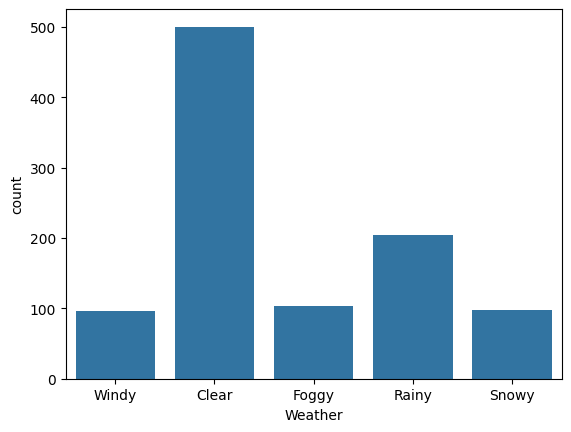

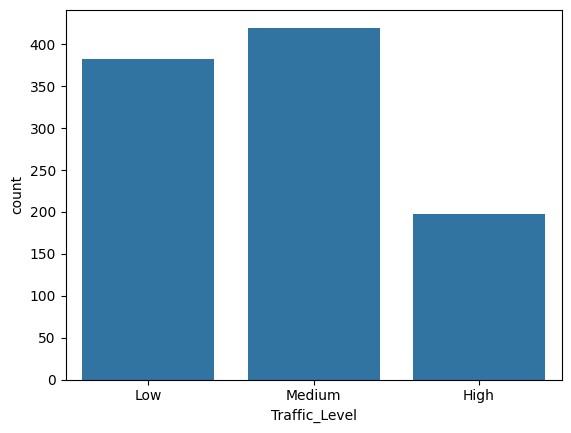

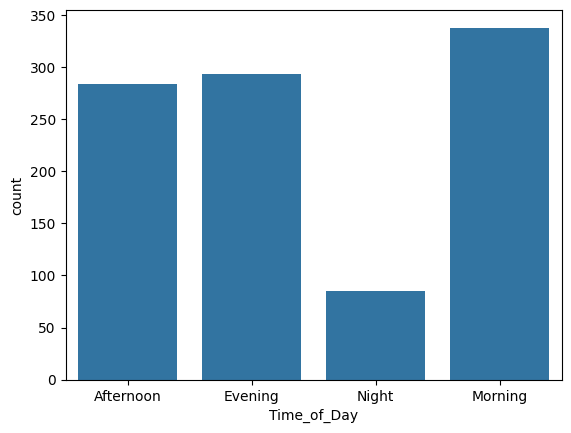

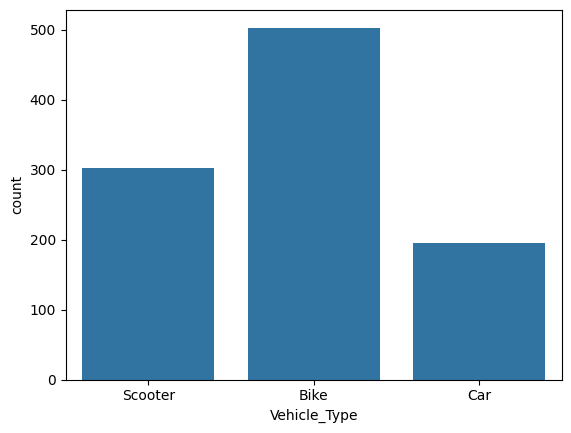

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
cat_cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
for col in cat_cols:
   sns.countplot(data=data,x=col)
   plt.show()

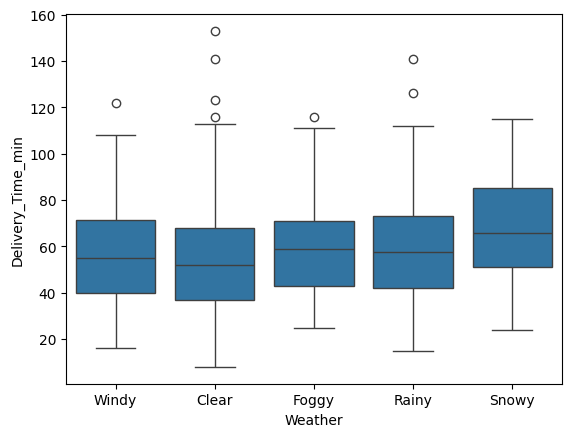

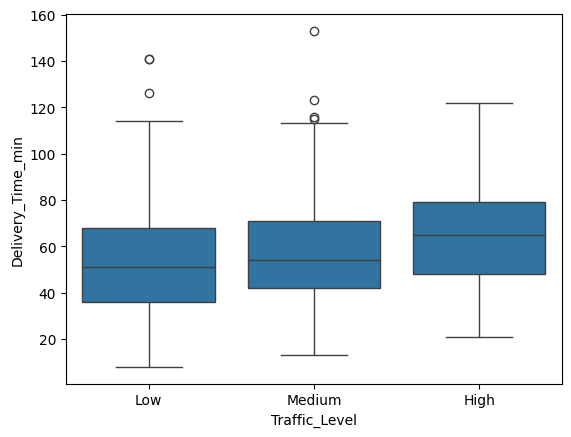

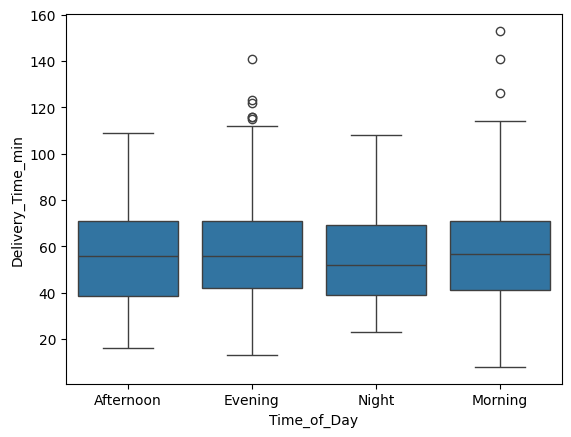

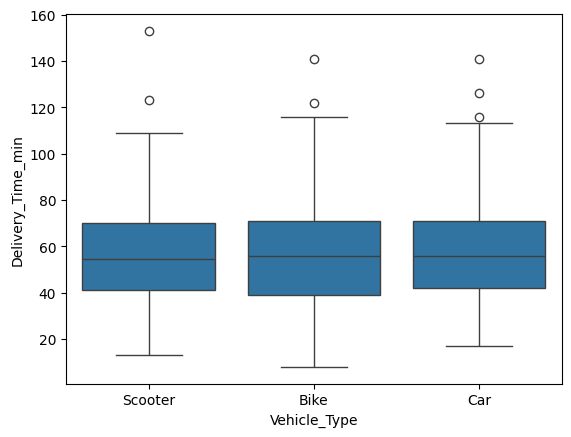

In [9]:
for col in cat_cols:
    sns.boxplot(data=data,x=col,y='Delivery_Time_min')
    plt.show()

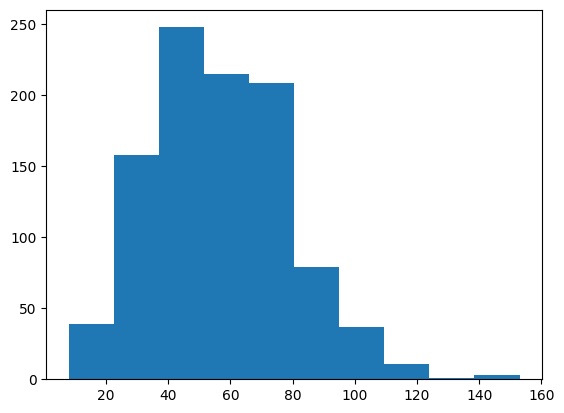

In [10]:
#Analyse de la distribution de la variable cible.
plt.hist(data['Delivery_Time_min'],bins=10)
plt.show()

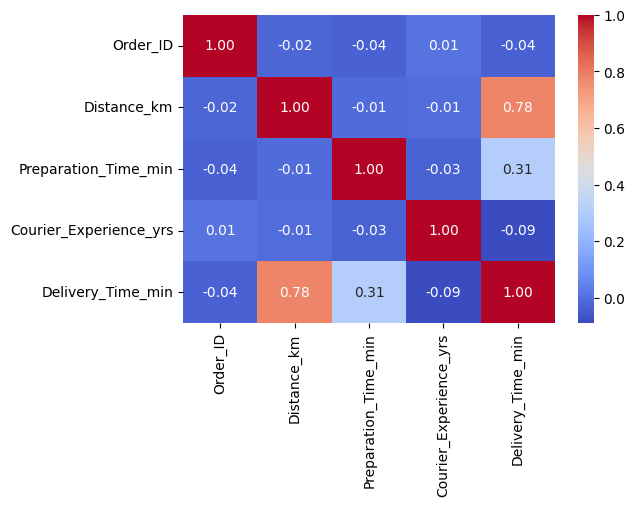

In [11]:
#Heatmap de corrélation des variables numériques
num_cols=data.select_dtypes(include=['int64','float64'])
matrice_corre=num_cols.corr()
plt.figure(figsize=(6,4))
sns.heatmap(matrice_corre,annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
# data preparation 
X=data.drop(columns=['Delivery_Time_min','Order_ID','Courier_Experience_yrs'])
y=data['Delivery_Time_min']

In [17]:
from sklearn.model_selection import train_test_split
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#encodage
from sklearn.preprocessing import OneHotEncoder

cat_cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
ohe=OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# Fit and transform
encoded_X_train = ohe.fit_transform(X_train[cat_cols])
encoded_X_test = ohe.transform(X_test[cat_cols])

# Convert to DataFrame with same index
encodedX_train_df = pd.DataFrame(encoded_X_train, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index)
encodedX_test_df = pd.DataFrame(encoded_X_test, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index)

# Concatenate back to original DataFrames
X_train = pd.concat([X_train.drop(columns=cat_cols), encodedX_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_cols), encodedX_test_df], axis=1)

In [19]:
# normalisation
from sklearn.preprocessing import StandardScaler
num_cols=['Distance_km','Preparation_Time_min']
scale=StandardScaler()
X_train[num_cols]=scale.fit_transform(X_train[num_cols])
X_test[num_cols]=scale.transform(X_test[num_cols])
data_scaled=X_train[num_cols].copy()
print(X_train)

     Distance_km  Preparation_Time_min  Weather_Foggy  Weather_Rainy  \
29      1.389200             -0.980721            0.0            0.0   
535    -1.391140              0.126852            0.0            0.0   
695    -1.200658             -0.011595            0.0            0.0   
557    -0.452710              1.372871            0.0            1.0   
836    -0.957750             -1.257614            0.0            1.0   
..           ...                   ...            ...            ...   
106     1.308813              0.957531            0.0            0.0   
270    -0.124172             -0.426935            0.0            0.0   
860     1.097361             -1.534508            0.0            0.0   
435     1.158525             -1.119168            0.0            0.0   
102    -1.614826              0.542192            0.0            0.0   

     Weather_Snowy  Weather_Windy  Traffic_Level_Low  Traffic_Level_Medium  \
29             0.0            0.0                0.0     

# SelectKbest

In [20]:
#selectKbest
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print("✅ Top 5 features selected:", selected_features.tolist())

✅ Top 5 features selected: ['Distance_km', 'Preparation_Time_min', 'Weather_Rainy', 'Weather_Snowy', 'Traffic_Level_Low']


# Using GridSearchCv

In [21]:
#Grid SearchCv for randomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
model = RandomForestRegressor()
param_grid={
    'n_estimators':[100,200,500],
    'max_depth':[None,10,20,30],
     'min_samples_leaf': [1, 2, 4] 
}
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_searchRf = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                 
    scoring=mae_scorer             
)
#train using gridSearch 
grid_searchRf.fit(X_train_selected,y_train)
# Best parameters according to refit metric
print("Best Params:", grid_searchRf.best_params_)

# Best score for the metric used to refit
print("Best mae:", grid_searchRf.best_score_)

# Best model 
print('best model : ',grid_searchRf.best_estimator_)

Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
Best mae: -8.143058646245462
best model :  RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=200)


In [22]:
# gridsearch for svr
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model = SVR()
param_grid_svr={
 'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_searchSvr = GridSearchCV(
    estimator=model,
    param_grid=param_grid_svr,
    cv=5,                 
    scoring=mae_scorer,                                    
)
#train using gridSearch 
grid_searchSvr.fit(X_train_selected,y_train)
# Best parameters according to refit metric
print("Best Params:", grid_searchSvr.best_params_)
# Best score for the metric used to refit
print("Best R2:", grid_searchSvr.best_score_)
# Best model
print('best model : ',grid_searchSvr.best_estimator_)

Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best R2: -7.102271209255056
best model :  SVR(C=10, kernel='linear')


# Evaluation des models

In [23]:
# Evaluation for random forest() 
from sklearn.metrics import mean_absolute_error
y_pred = grid_searchRf.best_estimator_.predict(X_test_selected)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)
mae = mean_absolute_error(y_test, y_pred)
mean_y = y_test.mean()
relative_error = mae / mean_y
print(f"Relative error: {relative_error:.2%}")

Test MAE: 7.7057639732716146
Relative error: 13.90%


In [24]:
# Evaluation for SVR()
y_pred = grid_searchSvr.best_estimator_.predict(X_test_selected)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)
mae = mean_absolute_error(y_test, y_pred)
mean_y = y_test.mean()
relative_error = mae / mean_y
print(f"Relative error: {relative_error:.2%}")

Test MAE: 6.618852926492045
Relative error: 11.94%


# Pipeline

In [ ]:
#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pipeline import cleanData,chooseXy

data=cleanData()
X_train, X_test, y_train, y_test=chooseXy(data)
num_cols=['Distance_km','Preparation_Time_min']
cat_cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']

preprocessor=ColumnTransformer(
  transformers=[
      ('num',StandardScaler(),num_cols),
      ('col',OneHotEncoder(handle_unknown='ignore'),cat_cols),
  ]
)
pipeline=Pipeline(steps=[
('preprocessor',preprocessor),
('model',RandomForestRegressor(random_state=42))
])
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 2, 4]
}
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=pipeline,
     param_grid=param_grid,
    cv=5,
    scoring=mae_scorer,
    n_jobs=-1
)
#  Train GridSearch
grid_search.fit(X_train, y_train)

#  Show results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MAE:", -grid_search.best_score_)

#  Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)
test_r2=r2_score(y_test, y_pred)
print("Test R2:", test_r2)

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__n_estimators': 200}
Best Cross-Validated MAE: 7.828301341133271
Test MAE: 6.863853498555825
Test R2: 0.7896425246342557


In [ ]:
#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pipeline import cleanData,chooseXy

data=cleanData()
X_train, X_test, y_train, y_test=chooseXy(data)
num_cols=['Distance_km','Preparation_Time_min']
cat_cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']

preprocessor=ColumnTransformer(
  transformers=[
      ('num',StandardScaler(),num_cols),
      ('col',OneHotEncoder(handle_unknown='ignore'),cat_cols),
  ]
)
pipeline=Pipeline(steps=[
('preprocessor',preprocessor),
('model',SVR())
])
param_grid_svr={
 'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_svr,
    cv=5,
    scoring=mae_scorer,
    n_jobs=-1
)
#  Train GridSearch
grid_search.fit(X_train, y_train)

#  Show results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MAE:", -grid_search.best_score_)

#  Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2=r2_score(y_test, y_pred)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)

Best Parameters: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best Cross-Validated MAE: 6.833064257984951
Test MAE: 6.003319409660853
Test R2: 0.8088182683525074
